## Craft a Story from a Dataset

Make sure that your story is appropriate to the audience type you selected.

Submit links to a GitHub repository containing a Jupyter Notebook or a PowerPoint. The file should contain:

1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call. 

In your quest, you might need to ask a bunch of other questions, such as:

● Can I count something interesting?

● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?

● Can I make a bar plot or a histogram?

● Can I compare two related quantities? 

● Can I make a scatterplot?

● Can I make a time-series plot?

● Looking at the plots, what are some insights I can make?

● Can I see any correlations?

● Is there a hypothesis I can - and should - investigate further?

● What other questions are the insights leading me to ask? 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go


In [67]:
sns.set_theme(style='whitegrid', palette='pastel')

In [68]:
url = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv"
data = pd.read_csv(url)
df = data

In [69]:
df.describe()

,id,age,longitude,latitude
count,7585.000000,7128.000000,6812.000000,6812.000000
mean,4191.009492,37.156846,-97.051749,36.665660
std,2369.576563,12.946711,16.602351,5.395637
min,3.000000,2.000000,-160.007000,19.498000
25%,2129.000000,27.000000,-112.039750,33.479750
50%,4217.000000,35.000000,-94.226000,36.093000
75%,6246.000000,45.000000,-83.073250,40.023500
max,8262.000000,92.000000,-67.867000,71.301000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7585 non-null   int64  
 1   name                     7190 non-null   object 
 2   date                     7585 non-null   object 
 3   manner_of_death          7585 non-null   object 
 4   armed                    7376 non-null   object 
 5   age                      7128 non-null   float64
 6   gender                   7568 non-null   object 
 7   race                     6178 non-null   object 
 8   city                     7585 non-null   object 
 9   state                    7585 non-null   object 
 10  signs_of_mental_illness  7585 non-null   bool   
 11  threat_level             7585 non-null   object 
 12  flee                     6776 non-null   object 
 13  body_camera              7585 non-null   bool   
 14  longitude               

In [71]:
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [72]:
df.isna().sum()

id                            0
name                        395
date                          0
manner_of_death               0
armed                       209
age                         457
gender                       17
race                       1407
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        809
body_camera                   0
longitude                   773
latitude                    773
is_geocoding_exact            0
dtype: int64

In [73]:
df['date'].max()
# downloaded dataframe earlier than this?

'2022-07-20'

In [74]:
nunique = df.nunique().sort_values()
print('Number of Unique Values by Column' + '\n')
nunique

Number of Unique Values by Column



is_geocoding_exact            2
body_camera                   2
manner_of_death               2
gender                        2
signs_of_mental_illness       2
threat_level                  3
flee                          4
race                          6
state                        51
age                          81
armed                       101
date                       2573
city                       3121
latitude                   5279
longitude                  5968
name                       7157
id                         7585
dtype: int64

In [75]:
# unique values in column
columns = df.columns
print('List of Unique Values by Column' + '\n' + '\n')
for col in columns:
    print(f'{col}:  {str(df[col].unique())} \n')

List of Unique Values by Column


id:  [   3    4    5 ... 8255 8256 8261] 

name:  ['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Matthew Davis'
 'Molka Horton' 'Jason Lipscomb'] 

date:  ['2015-01-02' '2015-01-03' '2015-01-04' ... '2022-07-18' '2022-07-19'
 '2022-07-20'] 

manner_of_death:  ['shot' 'shot and Tasered'] 

armed:  ['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'BB gun' 'metal pole'
 'Taser' 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'railroad spikes' 'stapler' 'beer bottle' 'unknown weapon' 'binoculars'
 'pellet gun' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden tool' 'p

# data wrangling and cleaning

In [76]:
# drop name and id columns
df.drop(columns=['name', 'id'], inplace=True)

# make separate df with latitude and longitude and remove from df
coord_df = df.copy()
df.drop(columns=['latitude','longitude'], inplace=True)

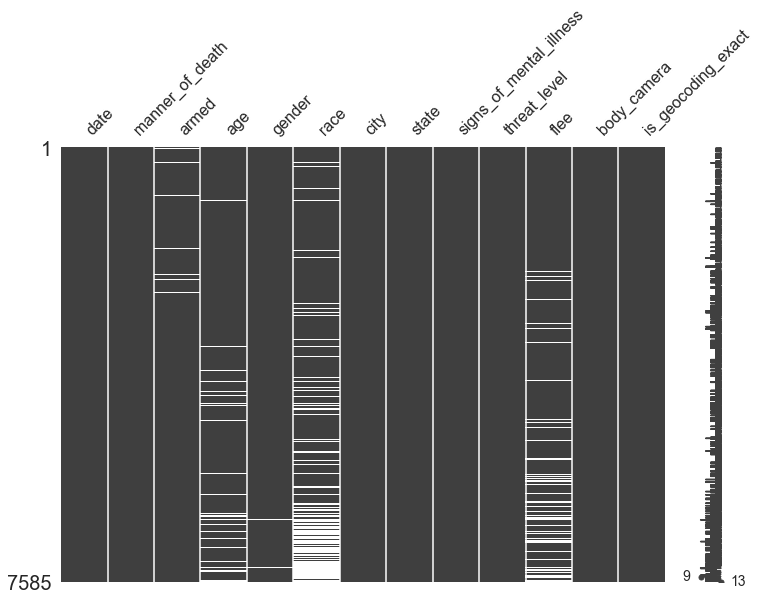

In [77]:
msno.matrix(df, figsize=(12,8))
plt.show()

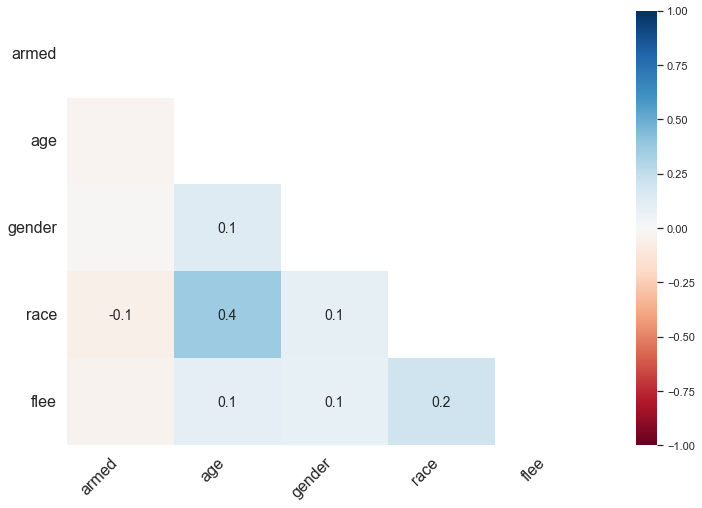

In [78]:
# check if missing data is correlated
msno.heatmap(df, figsize=(12,8))
plt.show()

In [79]:
df['flee'].value_counts()/len(df['flee'])

Not fleeing    0.566249
Car            0.162294
Foot           0.128016
Other          0.036783
Name: flee, dtype: float64

In [80]:
df['gender'].value_counts()/len(df['gender'])

M    0.952538
F    0.045221
Name: gender, dtype: float64

In [81]:
df['race'].value_counts()/len(df['race'])

W    0.416084
B    0.219117
H    0.146078
A    0.014370
N    0.012657
O    0.006196
Name: race, dtype: float64

In [82]:
# handle null values

# make null flee 'Not fleeing', as 
df['flee'] = df['flee'].fillna('Not fleeing')

# impute most common gender 'M' for null -- only 4% of shooting are female
df['gender'] = df['gender'].fillna('M')

# impute 'None' for null race -- 'None' is unknown according to WaPo GitHub
# don't want to make assumptions on race to skew data unnecessarily
df['race'] = df['race'].fillna('None')

# make null age median age of that state
df['age'] = df.groupby('state')['age'].apply(lambda x: x.fillna(x.median()))

# armed null now 'undetermined'
df['armed'] = df['armed'].fillna('undetermined')

In [83]:
# correct data types
df['age'] = df['age'].astype(int)
coord_df['latitude'] = coord_df['latitude'].astype(float)
coord_df['longitude'] = coord_df['longitude'].astype(float)

In [84]:
# T/F values to 1/0
#vals = {True:1, False:0}
#df['body_camera'] = df['body_camera'].map(vals)
#df['signs_of_mental_illness'] = df['signs_of_mental_illness'].map(vals)

manner = {'shot':'shot', 'shot and Tasered':'tasered and shot'}
df['manner_of_death'] = df['manner_of_death'].map(manner)

In [85]:
# Race labels for visualization
race_dict = {'A':'Asian','B':'Black','H':'Hispanic','N':'Native','W':'White','O':'Other','None': 'None'}
df['race'] = df['race'].map(race_dict)

In [86]:
# bin age
df['age_binned'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 30, 45, 60, 75, np.inf], labels=['Under 18','18-29', '30-44', '45-59', '60-75', 'Over 75'])


In [87]:
df.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
is_geocoding_exact         0
age_binned                 0
dtype: int64

In [88]:
# organizing 'armed' feature by creating difference breakdowns from over 100 different categories

unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle', 'nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'pair of scissors', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon']
d_armed = dict.fromkeys(armed, 'armed')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_3 = {**d_unarmed, **d_armed, **d_und}

df['armed_3'] = df['armed'].map(armed_3)

In [90]:
# differentiate guns
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed_gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle']
d_armed_gun = dict.fromkeys(armed_gun, 'gun')

armed_other = ['nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pair of scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon']
d_armed_other = dict.fromkeys(armed_other, 'other weapon')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_4 = {**d_unarmed, **d_armed_gun, **d_armed_other, **d_und}

df['armed_4'] = df['armed'].map(armed_4)

In [91]:
# further stratified
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 
           'vehicle and gun', 'gun and vehicle']
d_gun = dict.fromkeys(gun, 'gun')

knife = ['knife','hatchet','sword','machete','box cutter', 'lawn mower blade','sharp object', 'meat cleaver',
    'straight edge razor', 'ax', 'chain saw', 'garden tool', 'scissors', 'pair of scissors', 'pick-axe','spear', 'pitchfork', 'hatchet and gun', 'machete and gun', 'pole and knife', 
    'chainsaw','samurai sword','baseball bat and knife', 'vehicle and machete', 'ice pick','car, knife and mace', 'knife and vehicle', 'machete and hammer',
    'ax and machete']
d_knives = dict.fromkeys(knife, 'knife/cutting instrument')

# separated toy guns from airsoft, bb guns, and pellet guns
air_bb = ['BB gun', 'pellet gun', 'BB gun and vehicle', 'air pistol', 'Airsoft pistol']
d_air_bb = dict.fromkeys(air_bb, 'air/bb/pellet guns')

toy = ['toy weapon']
d_toy = dict.fromkeys(toy, 'toy weapon')

other = ['nail gun', 'shovel', 'vehicle','hammer', 'metal object', 'screwdriver', 'flagpole', 'cordless drill',
         'crossbow','metal pole','Taser', 'metal pipe', 'metal hand tool','blunt object', 'metal stick','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon','binoculars',
         'bean-bag gun', 'baseball bat and fireplace poker', 'brick', 'baseball bat','hand torch','pole', 'flashlight',
         'baton','chair','pitchfork', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle', 'pepper spray',
         'metal rake', 'crowbar', 'oar', 'tire iron', 'air conditioner', 'baseball bat and bottle', 'fireworks',
         'pen','incendiary device', 'bow and arrow', 'wrench', 'walking stick','barstool', 'grenade', 'wasp spray',
         'bottle', 'microphone','stake', 'incendiary weapon','unknown weapon'] 
d_other = dict.fromkeys(other, 'other weapon')

undetermined: ['claimed to be armed', 'undetermined']
d_undet = dict.fromkeys(undetermined, 'undetermined')

armed_7 = {**d_unarmed, **d_gun, **d_knives, **d_air_bb, **d_toy, **d_other, **d_undet}

df['armed_7'] = df['armed'].map(armed_7)

In [92]:
df.drop(columns='armed', inplace=True)

notes:

*threat_level:* The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

*is_geocoding_exact:* False means centroid area [lat,long]; True means [lat,long] within approximately 100 meters

*armed:* undetermined includes nan; armed_other includes (explosives, fire, blunt objects, melee weapons, bean bag gun)

In [93]:
df['count'] = 1

In [94]:
# make MM-YY column from date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
# make YY column from date
df['year'] = df['date'].dt.year
# make quarter column from date
df['quarter'] = df['date'].dt.quarter

In [95]:
df.columns

Index(['date', 'manner_of_death', 'age', 'gender', 'race', 'city', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'is_geocoding_exact', 'age_binned', 'armed_3', 'armed_4', 'armed_7',
       'count', 'month', 'year', 'quarter'],
      dtype='object')

# adding census data

In [96]:
state_pop19 = pd.read_csv('../Fatal-Police-Shootings-WaPo/statepop/nst-est2019-popchg2010_2019.csv')

In [97]:
# create state population dataframe
state_pop = pd.DataFrame(columns=['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019'])
state_pop[['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019']] = state_pop19[['NAME','POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]
# drop regions and PR
state_pop.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop.reset_index(drop=True,inplace=True)

In [98]:
state_pop20_21 = pd.read_csv('../Fatal-Police-Shootings-WaPo/statepop/NST-EST2021-popchg2020_2021.csv')

In [99]:
state_pop20_21.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop20_21.reset_index(drop=True, inplace=True)

state_pop[['PopEstimate2020', 'PopEstimate2021']] = state_pop20_21[['POPESTIMATE2020', 'POPESTIMATE2021']]

In [100]:
state_abbrev = {'United States':'Total', 'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 
                'California':'CA','Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE','District of Columbia':'DC',
                'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois': 'IL','Indiana': 'IN',
                'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 
                'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri': 'MO',
                'Montana': 'MN', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH','New Jersey':'NJ', 'New Mexico':'NM',
                'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK', 'Oregon':'OR',
                'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN',
                'Texas':'TX', 'Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA', 'West Virginia':'WV',
                'Wisconsin':'WI', 'Wyoming':'WY'}

state_pop['state'] = state_pop['state_name'].map(state_abbrev)

In [101]:
state_pop.set_index(keys='state', inplace=True)

In [102]:
# merge state pop data
df = pd.merge(df,state_pop, on='state')

In [104]:
# 30-44 year olds are the largest age group represented with 43.7% of deaths, followed by 18-29 year olds with 29.7%
df['age_binned'].value_counts()/len(df['age_binned'])

30-44       0.437738
18-29       0.298124
45-59       0.179635
60-75       0.045663
Under 18    0.032542
Over 75     0.006298
Name: age_binned, dtype: float64

In [105]:
d = df.groupby([df.month, df.year])['count'].sum()

In [106]:
d = d.unstack().cumsum()

In [107]:
d

year,2015,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,
1,77.0,80.0,93.0,99.0,93.0,87.0,81.0,73.0
2,154.0,167.0,193.0,177.0,166.0,166.0,181.0,162.0
3,247.0,260.0,270.0,285.0,254.0,259.0,269.0,260.0
4,331.0,334.0,338.0,380.0,325.0,338.0,358.0,353.0
5,403.0,410.0,409.0,463.0,400.0,448.0,442.0,443.0
6,468.0,500.0,493.0,545.0,486.0,523.0,552.0,536.0
7,573.0,572.0,589.0,634.0,567.0,592.0,625.0,596.0
8,667.0,656.0,671.0,708.0,655.0,679.0,721.0,NaN
9,751.0,735.0,740.0,762.0,734.0,739.0,803.0,NaN


In [108]:
pivoted = df.pivot_table(index='month', columns='year', values='count', aggfunc={'count':'sum'})#.plot(figsize=(15,10))                                                                             
#plt.legend(loc='lower right')
#plt.show()
# count or sum for aggfunc
pivoted

year,2015,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,
1,77.0,80.0,93.0,99.0,93.0,87.0,81.0,73.0
2,77.0,87.0,100.0,78.0,73.0,79.0,100.0,89.0
3,93.0,93.0,77.0,108.0,88.0,93.0,88.0,98.0
4,84.0,74.0,68.0,95.0,71.0,79.0,89.0,93.0
5,72.0,76.0,71.0,83.0,75.0,110.0,84.0,90.0
6,65.0,90.0,84.0,82.0,86.0,75.0,110.0,93.0
7,105.0,72.0,96.0,89.0,81.0,69.0,73.0,60.0
8,94.0,84.0,82.0,74.0,88.0,87.0,96.0,NaN
9,84.0,79.0,69.0,54.0,79.0,60.0,82.0,NaN


more exploratory 

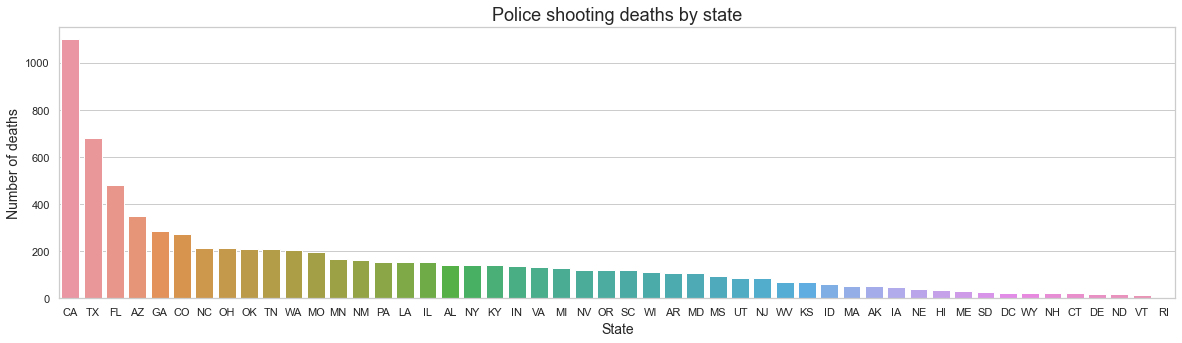

In [110]:
shot_by_state = df.state.value_counts()

plt.figure(figsize=(20, 5))
plt.title('Police shooting deaths by state', fontsize=18)
sns.barplot(shot_by_state.index, shot_by_state)
plt.ylabel('Number of deaths', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.show()

In [111]:
# plot total killings (2015-2022) by state per 100,000 people of that state (using 2020 population)
state_pop_2020 = state_pop['PopEstimate2020'].drop('Total').sort_index(ascending=True)
shot_by_state = df.state.value_counts().sort_index(ascending=True)

In [112]:
adj_shot_by_state = round(shot_by_state/(state_pop_2020/100000), 2).sort_values(ascending=False)
adj_shot_by_state.head(5)

MN    15.47
NM     7.65
AK     7.10
OK     5.33
AZ     4.85
dtype: float64

In [113]:
# very different from states with actual highest number of killings (higher population states)

In [114]:
shot_by_city = df.city.value_counts()
shot_by_city_top20 = shot_by_city.head(20)

In [115]:
#top20_cams.groupby(['city','year'])
top20_cams_by_year = df.groupby([df.city, df.year])['count','body_camera'].sum().sort_values(by='count', ascending=False)
cams_by_city = df.groupby([df.city])['count','body_camera'].sum().sort_values(by='count', ascending=False)

In [116]:
top20_cams_by_year = top20_cams_by_year.unstack(level=-1, fill_value = 0)

In [117]:
top20_cams = cams_by_city[:20]

In [118]:
top20_cams

,count,body_camera
city,,
Los Angeles,120,25
Phoenix,101,15
Houston,83,20
San Antonio,66,11
Las Vegas,62,28
Albuquerque,52,10
Chicago,49,12
Denver,46,2
Columbus,46,7


In [119]:
top20_cams['no_body_camera'] = top20_cams['count'] - top20_cams['body_camera']

/var/folders/v_/wdytmqyx1377p1m8yrz0tdrr0000gn/T/ipykernel_27371/1872087179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
len(top20_cams['body_camera'])

20

In [121]:
top20_cams

,count,body_camera,no_body_camera
city,,,
Los Angeles,120,25,95
Phoenix,101,15,86
Houston,83,20,63
San Antonio,66,11,55
Las Vegas,62,28,34
Albuquerque,52,10,42
Chicago,49,12,37
Denver,46,2,44
Columbus,46,7,39


In [176]:
#top20_cams['city'] = top20_cams.index.values

In [122]:
top20_cams

,count,body_camera,no_body_camera
city,,,
Los Angeles,120,25,95
Phoenix,101,15,86
Houston,83,20,63
San Antonio,66,11,55
Las Vegas,62,28,34
Albuquerque,52,10,42
Chicago,49,12,37
Denver,46,2,44
Columbus,46,7,39


In [123]:
cities = list(top20_cams.index)
top20_race = df.loc[df['city'].isin(cities)]


In [124]:
top20_race['race'].value_counts()/len(top20_race)

Black       0.306064
Hispanic    0.273340
White       0.229066
None        0.167469
Asian       0.010587
Native      0.010587
Other       0.002887
Name: race, dtype: float64

In [125]:
shot_by_race = df['race'].value_counts()

In [126]:
# most people killed are white
# 18.5% of shootings don't have race reported

In [127]:
# according to Census Bureau Quick Fact Sheet https://www.census.gov/quickfacts/fact/table/US/PST045221
# -- White: 75.8%, White not hispanic: 59.3%, Black: 13.6%, Asian alone: 6.1%, Hispanic/Latino: 18.9%, 
# Native American: 1.3%, Hawaiian Pacific Islander: 0.3%

race_prop = shot_by_race/len(df)
race_prop

White       0.416218
Black       0.220181
None        0.184097
Hispanic    0.145781
Asian       0.014696
Native      0.012466
Other       0.006561
Name: race, dtype: float64

In [128]:
# account for population race proportions
race = {'White':'W','Black':'B', 'Asian':'A','Hispanic':'H', 'Native':'N','Other':'O', 'None':'No'}
by_race = df[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
by_race['race'] = by_race['race'].map(race)
by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)

In [129]:
pop = pd.DataFrame({'race':['W','B','H','A','N','O'],
'2020_population':[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]})
pop['2020_population'] = pop['2020_population']*331.5

In [130]:
by_race = pd.merge(by_race, pop, on='race')
by_race['deaths_per_mil'] = by_race['number_of_deaths'] / by_race['2020_population']
by_race.head()

,race,year,number_of_deaths,2020_population,deaths_per_mil
0,A,2015,15,20.2215,0.741785
1,A,2016,16,20.2215,0.791237
2,A,2017,17,20.2215,0.840689
3,A,2018,21,20.2215,1.038499
4,A,2019,21,20.2215,1.038499


In [131]:
# race (including 'None') as percentage of total
#race = {'White':'W','Black':'B', 'Asian':'A','Hispanic':'H', 'Native':'N','Other':'O', 'None':'No'}
perc_race = df[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
#perc_race['race'] = perc_race['race'].map(race)
perc_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)
perc_race.head() 

,race,year,number_of_deaths
0,Asian,2015,15
1,Asian,2016,16
2,Asian,2017,17
3,Asian,2018,21
4,Asian,2019,21


In [132]:
df.race.unique()

array(['Asian', 'Hispanic', 'White', 'Native', 'Other', 'Black', 'None'],
      dtype=object)

In [133]:
# 343 fatal police shootings were of women
fem = df[df['gender'] == 'F']
# race breakdown
# account for population race proportions
race = {'White':'White','Black':'B', 'Hispanic':'H', 'Asian':'A', 'Native':'N','Other':'O', 'None':'No'}
fem_by_race = fem[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
#fem_by_race['race'] = fem_by_race['race'].map(race)
fem_by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)
#fem_by_race.head(20)

In [134]:
#fem_by_race = pd.merge(fem_by_race, pop, on='race')
#fem_by_race['deaths_per_mil'] = fem_by_race['number_of_deaths'] / (fem_by_race['2020_population']/2) 
# /2 b/c half pop is theoretically female

In [135]:
fem_by_race = fem_by_race.sort_values(by='year')

In [136]:
fem_by_race

,race,year,number_of_deaths
0,Asian,2015,1
31,White,2015,27
14,Hispanic,2015,3
6,Black,2015,10
28,Other,2015,1
15,Hispanic,2016,1
21,Native,2016,5
32,White,2016,24
7,Black,2016,11
8,Black,2017,9


In [137]:
fem['race'].value_counts()/len(fem)

White       0.543605
Black       0.168605
None        0.148256
Hispanic    0.095930
Asian       0.020349
Native      0.014535
Other       0.008721
Name: race, dtype: float64

In [138]:
#df['race'].value_counts()
# (331.5*[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]) == 196 W, 45 B, 63 H, 20 A, 4.3 N, 3 O 
#df[df['race']]
# if use this information, can make graphic simialr to last one on WaPo page

In [139]:
# an interesting pattern here

In [140]:
unarmed = df[df['armed_4'] == 'unarmed']
# 705 total unarmed
unarmed_by_race = unarmed['race'].value_counts()
unarmed_race_prop = unarmed_by_race/len(unarmed)

gun = df[df['armed_4'] == 'gun']
# 4414 total armed with gun
gun_by_race = gun['race'].value_counts()
gun_race_prop = gun_by_race/len(gun)

In [141]:
unarmed_race_prop

White       0.444759
Black       0.269122
Hispanic    0.164306
None        0.086402
Asian       0.016997
Native      0.011331
Other       0.007082
Name: race, dtype: float64

In [142]:
gun_race_prop

White       0.423817
Black       0.234775
None        0.183382
Hispanic    0.131537
Native      0.011320
Asian       0.010414
Other       0.004754
Name: race, dtype: float64

In [143]:
no_none = df.copy()
no_none = no_none[no_none['race'] != 'None']

In [144]:
no_none['race'].value_counts()/len(no_none)
# percentages change when None race is removed

White       0.510132
Black       0.269862
Hispanic    0.178675
Asian       0.018012
Native      0.015278
Other       0.008041
Name: race, dtype: float64

85% of deadly police shootings did not have body cam footage

a significant number of shootings do not have race reported

In [209]:
# export important dataframes as csv
dataframe = (by_race, perc_race, shot_by_state, adj_shot_by_state, shot_by_city, shot_by_race, d, cams_by_city, top20_cams,
 top20_cams_by_year, fem_by_race, unarmed_by_race, gun_by_race, no_none)
names = ('by_race', 'perc_race', 'shot_by_state', 'adj_shot_by_state', 'shot_by_city', 'shot_by_race', 'd', 'cams_by_city', 'top20_cams',
 'top20_cams_by_year', 'fem_by_race', 'unarmed_by_race', 'gun_by_race', 'no_none')


In [213]:
x = zip(names, dataframes)
for (name, data) in x: 
    df = data
    name = name
    path = f'{name}.csv'
    df.to_csv(path)

by_race
perc_race
shot_by_state
adj_shot_by_state
shot_by_city
shot_by_race
d
cams_by_city
top20_cams
top20_cams_by_year
fem_by_race
unarmed_by_race
gun_by_race
no_none


In [145]:
df.to_csv(f'full_df.csv')